In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns

In [5]:
os.chdir('c:\\Users\\quinn\\Sberbank') 

In [6]:
train=pd.read_csv('trainVariables2.csv')

In [7]:
train.fillna(train.median(), inplace = True)

In [8]:
q=train['full_sq'].quantile(.99)
data_1=train[train['full_sq']<q]

In [9]:
r=data_1['floor'].quantile(.99)
data_2=data_1[data_1['floor']<r]

In [10]:
s=data_2['floor'].quantile(.99)
data_3=data_2[data_2['floor']<r]

In [11]:
t=data_3['kremlin_km'].quantile(.99)
data_4=data_3[data_3['kremlin_km']<t]

In [12]:
u=data_4['price_doc'].quantile(.99)
data_5=data_4[data_4['price_doc']<u]

In [13]:
new_data=data_5.reset_index(drop=True)

In [14]:
x=new_data.iloc[:, :-1].values
y=new_data.iloc[:, -1].values

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [25]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 101)
regressor.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=101, splitter='best')

In [26]:
y_pred = regressor.predict(x_test)
np.set_printoptions(precision = 2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test), 1)), 1))

[[ 4702896.  4997535.]
 [ 8500000.  2000000.]
 [10181357. 10003267.]
 ...
 [ 2500000.  5900000.]
 [ 2000000. 11900000.]
 [ 5886193.  5332762.]]


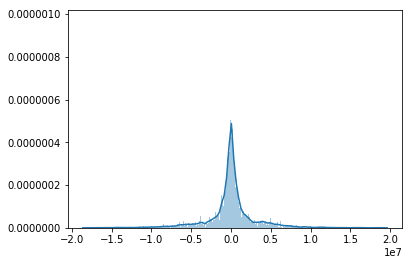

In [27]:
sns.distplot((y_test-y_pred), bins = 500)

In [28]:
from sklearn import metrics

In [29]:
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE 3119826.2535735755


In [34]:
metrics.r2_score(y_test, y_pred)

0.12904502862085954